<a href="https://colab.research.google.com/github/Raqueljrp/Dise-o-Experimental/blob/main/202506_DCA_Parte2_FORM2_Rrey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos 2025**
# **Formato para Trabajar en Colab 2025**
# **Escribe el Nombre del Curso**: Diseno de Experimentos
## **Escribe tu nombre completo**: Raquel Jimena Rey Prada
> Email: rrey@utb.edu.co

> Celular:3006613549

> Código Estudiantil: T00057965

> Github:

## **TEMA: Diseño Completamente Aleatorizado**



<a name="inicio"></a>

## **1.** [Diseno en Cuadrado Greco Latino - DCGL](#T1)
## **2.** [Datos del problema](#T2)
## **3.** [Tabla Anova](#T3)
## **4.** [Turkey Honestly Significant Difference (HSD)](#T4)
## **5.** [Prueba LSD](#T5)


[⬆️ Volver al inicio](#inicio)

<a name="T1"></a>
## **1. Diseno Completamente Aleatorizado**


## Problema 1

Se realizó una investigación para determinar la pérdida de nitrógeno por transpiración con varios niveles dietéticos de proteínas. En el experimento se utilizaron 16 hombres preadolescentes a quienes se les juzgó estar saludables. Cada muchacho estuvo sujeto a una de las cuatro dietas controladas en las cuales consumía 20, 45, 60 u 85 gramos de proteínas por día. Los siguientes datos representan la pérdida de nitrógeno del cuerpo a través de la transpiración, en miligramos, recabados durante los dos días últimos del periodo de experimentación.



| Dieta (Gramos de Proteína) | Pérdida de Nitrógeno (mg) |
|----------------------------|---------------------------|
| A (20)                     | 190                       |
| A (20)                     | 180                       |
| A (20)                     | 200                       |
| A (20)                     | 210                       |
| B (45)                     | 210                       |
| B (45)                     | 240                       |
| B (45)                     | 250                       |
| B (45)                     | 235                       |
| C (60)                     | 318                       |
| C (60)                     | 295                       |
| C (60)                     | 270                       |
| C (60)                     | 380                       |
| D (85)                     | 390                       |
| D (85)                     | 321                       |
| D (85)                     | 396                       |
| D (85)                     | 399                       |

[⬆️ Volver al inicio](#inicio)

<a name="T2"></a>
## **2. Datos del Problema**


In [ ]:
import pandas as pd

data = {'Dieta': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D'],
        'Perdida_Nitrogeno': [190, 180, 200, 210, 210, 240, 250, 235, 318, 295, 270, 380, 390, 321, 396, 399]}

df = pd.DataFrame(data)

display(df)

,Dieta,Perdida_Nitrogeno
0,A,190
1,A,180
2,A,200
3,A,210
4,B,210
5,B,240
6,B,250
7,B,235
8,C,318
9,C,295


[⬆️ Volver al inicio](#inicio)


<a name="T3"></a>
## **3. Tabla Anova**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform one-way ANOVA
model = ols('Perdida_Nitrogeno ~ C(Dieta)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)

# Display the ANOVA table
display(anova_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dieta),3.0,79816.5,26605.500000,26.224157,0.000015
Residual,12.0,12174.5,1014.541667,NaN,NaN


Para encontrar el valor teórico de F usando tablas, necesitamos los grados de libertad del numerador y del denominador de la tabla ANOVA, así como el nivel de significancia (alpha) que deseas utilizar (comúnmente 0.05).

De la tabla ANOVA:
*   Grados de libertad del numerador (C(Dieta)): 3
*   Grados de libertad del denominador (Residual): 12

Con un nivel de significancia de 0.05, buscarías el valor F en una tabla de distribución F con 3 grados de libertad en el numerador y 12 grados de libertad en el denominador.

El valor teórico de F para un alpha de 0.05, con 3 y 12 grados de libertad es aproximadamente **3.49**.

[⬆️ Volver al inicio](#inicio)


<a name="T4"></a>
## **4. Turkey HSD**

## **¿Qué es la Prueba HSD de Tukey y por qué es Importante?**

La prueba de Diferencia Significativa Honesta (HSD) de Tukey es una prueba post-hoc que se utiliza después de realizar un Análisis de Varianza (ANOVA) y encontrar que existe una diferencia estadísticamente significativa entre las medias de tres o más grupos.

**¿Por qué es importante?**

El ANOVA nos dice si al menos una de las medias de los grupos es diferente de las otras, pero no nos dice **cuáles** grupos son diferentes entre sí. La prueba HSD de Tukey compara todas las posibles parejas de medias de grupo para determinar cuáles diferencias son estadísticamente significativas, controlando la tasa de error tipo I (la probabilidad de rechazar una hipótesis nula verdadera) para el conjunto de comparaciones.

En resumen, si el ANOVA indica que hay diferencias significativas, la prueba HSD de Tukey es crucial para identificar las diferencias específicas entre los grupos y obtener conclusiones más detalladas sobre los efectos de los factores estudiados.

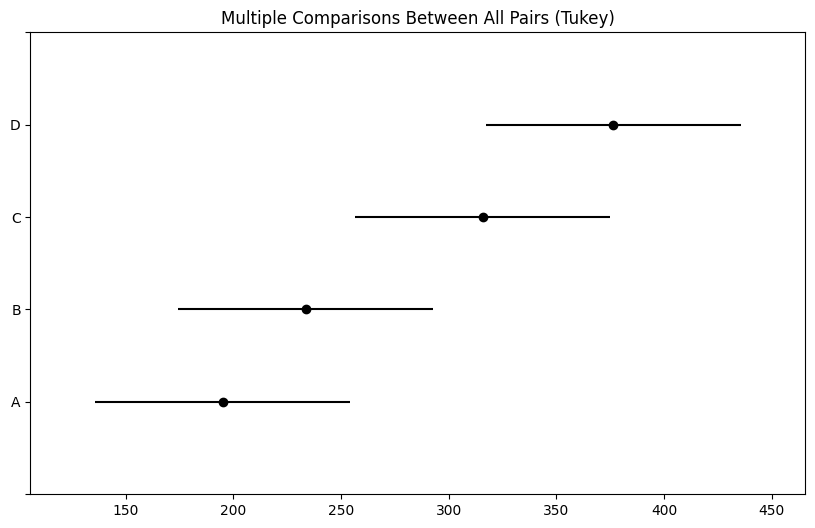

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey HSD test
tukey_results = pairwise_tukeyhsd(endog=df['Perdida_Nitrogeno'], groups=df['Dieta'], alpha=0.001)

# Display the results
display(tukey_results)

# Generate a plot of the results
tukey_results.plot_simultaneous()
plt.show()

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey HSD test
tukey_results = pairwise_tukeyhsd(endog=df['Perdida_Nitrogeno'], groups=df['Dieta'], alpha=0.001)

# Generate a plot of the results with a smaller figure size
fig, ax = plt.subplots(figsize=(8, 4)) # Adjusted figure size
tukey_results.plot_simultaneous(ax=ax)
plt.show()

[⬆️ Volver al inicio](#inicio)

<a name="T5"></a>
## **5. Prueba LSD**


## **¿Qué es la Prueba LSD de Fisher ?**

La prueba de Diferencia Mínima Significativa (LSD) de Fisher es otra prueba post-hoc que se utiliza después de realizar un Análisis de Varianza (ANOVA) y encontrar que existe una diferencia estadísticamente significativa entre las medias de tres o más grupos.

**¿Por qué es importante?**

Al igual que la prueba HSD de Tukey, la prueba LSD de Fisher se utiliza para hacer comparaciones por pares entre las medias de los grupos después de un ANOVA significativo. Ayuda a identificar cuáles parejas de grupos tienen medias significativamente diferentes.



LSD value (alpha=0.05): 49.0727

Pairwise comparisons (LSD approach):
A vs B: p-value = 0.0110
A vs C: p-value = 0.0026
A vs D: p-value = 0.0001
B vs C: p-value = 0.0169
B vs D: p-value = 0.0004
C vs D: p-value = 0.0893


/tmp/ipython-input-1262915711.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dieta', y='Perdida_Nitrogeno', data=mean_per_diet, palette='viridis', ci=None)
/tmp/ipython-input-1262915711.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dieta', y='Perdida_Nitrogeno', data=mean_per_diet, palette='viridis', ci=None)


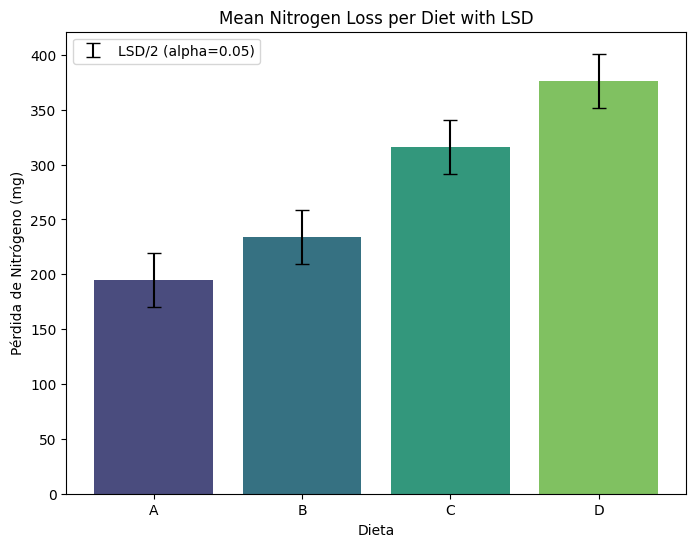

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# --- Modelo ANOVA ---
# Supongamos que tu DataFrame se llama df y tiene columnas 'Dieta' y 'Perdida_Nitrogeno'
model = smf.ols('Perdida_Nitrogeno ~ C(Dieta)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Obtener MSE (Mean Square Error = sum_sq / df del residual)
mse = anova_table.loc['Residual', 'sum_sq'] / anova_table.loc['Residual', 'df']
n = df.groupby('Dieta').size().iloc[0]  # Número de observaciones por grupo (asumiendo balanceado)
pooled_std = np.sqrt(mse)

# --- LSD ---
alpha = 0.05
df_residual = int(anova_table.loc['Residual', 'df'])
t_value = stats.t.ppf(1 - alpha/2, df_residual)
lsd_value = t_value * pooled_std * np.sqrt(2/n)

print(f"LSD value (alpha={alpha}): {lsd_value:.4f}")

# --- Comparaciones pareadas ---
diets = df['Dieta'].unique()
comparisons = []
p_values = []
diffs = []

for i in range(len(diets)):
    for j in range(i + 1, len(diets)):
        group1 = df[df['Dieta'] == diets[i]]['Perdida_Nitrogeno']
        group2 = df[df['Dieta'] == diets[j]]['Perdida_Nitrogeno']
        ttest = ttest_ind(group1, group2)
        comparisons.append(f'{diets[i]} vs {diets[j]}')
        p_values.append(ttest.pvalue)
        diffs.append(np.mean(group1) - np.mean(group2))

print("\nPairwise comparisons (LSD approach):")
for i in range(len(comparisons)):
    print(f"{comparisons[i]}: p-value = {p_values[i]:.4f}")

# --- Gráfico ---
mean_per_diet = df.groupby('Dieta')['Perdida_Nitrogeno'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Dieta', y='Perdida_Nitrogeno', data=mean_per_diet, palette='viridis', ci=None)

# Eje x como índices numéricos para errorbar
x_positions = np.arange(len(mean_per_diet))
plt.errorbar(x=x_positions,
             y=mean_per_diet['Perdida_Nitrogeno'],
             yerr=lsd_value/2, fmt='none',
             c='black', capsize=5, label=f'LSD/2 (alpha={alpha})')

plt.xticks(x_positions, mean_per_diet['Dieta'])
plt.ylabel('Pérdida de Nitrógeno (mg)')
plt.title('Mean Nitrogen Loss per Diet with LSD')
plt.legend()
plt.show()


[⬆️ Volver al inicio](#inicio)